In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Datasets
stats_countries = pd.read_excel("C:/Users/14027/Documents/Graduate_Schoolish/DSC_640/all-weeks-countries-netflix.xlsx") #Used
stats_global = pd.read_excel("C:/Users/14027/Documents/Graduate_Schoolish/DSC_640/all-weeks-global-netflix.xlsx") #Used
most_popular = pd.read_excel("C:/Users/14027/Documents/Graduate_Schoolish/DSC_640/most-popular-netflix.xlsx")

C:\Users\14027\OneDrive\Attachments\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
# TV (Non-English) Films(Non-English)
#Gather a dataset with non-english content only 
# Split into films and TV
stats_films = stats_global[stats_global['category'] == 'Films (Non-English)']
stats_tv  = stats_global[stats_global['category'] == 'TV (Non-English)']
# Only want to keep the first intance of a show or movie
stats_films = stats_films.drop_duplicates(subset=['show_title'], keep='first')
stats_tv = stats_tv.drop_duplicates(subset=['show_title'], keep='first')
# Find the top 20 in each dataset based weekly hours
tv_20 = stats_tv.nlargest(20,'weekly_hours_viewed')
film_20 = stats_films.nlargest(20,'weekly_hours_viewed')
film_20 = film_20.drop('week',axis = 1)
film_20.head()

,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
2970,Films (Non-English),1,Troll,NaN,75860000,NaN,NaN,1,False,NaN
5250,Films (Non-English),1,Society of the Snow,NaN,55800000,2.4333,22900000.0,1,False,NaN
4690,Films (Non-English),1,Nowhere,NaN,43200000,1.8167,23800000.0,1,False,NaN
3290,Films (Non-English),1,Narvik,NaN,37980000,NaN,NaN,1,False,NaN
130,Films (Non-English),1,Blood Red Sky,NaN,35930000,NaN,NaN,1,False,NaN


In [5]:
## Charts for the top movies and tv shows English

In [6]:
# Split into films and TV
stats_films_eng = stats_global[stats_global['category'] == 'Films (English)']
stats_tv_eng  = stats_global[stats_global['category'] == 'TV (English)']
# Only want to keep the first intance of a show or movie
stats_films_eng = stats_films_eng.drop_duplicates(subset=['show_title'], keep='first')
stats_tv_eng = stats_tv_eng.drop_duplicates(subset=['show_title'], keep='first')
# Find the top 20 in each dataset based weekly hours

tv_20_eng = stats_tv_eng.nlargest(20,'weekly_hours_viewed')
film_20_eng = stats_films_eng.nlargest(20,'weekly_hours_viewed')
film_20_eng = film_20_eng.drop('week',axis = 1)
film_20_eng.head()

,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
760,Films (English),1,Red Notice,NaN,148720000,NaN,NaN,1,False,NaN
1000,Films (English),1,Don't Look Up,NaN,111030000,NaN,NaN,1,False,NaN
5080,Films (English),1,Leave the World Behind,NaN,98700000,2.3667,41700000.0,1,False,NaN
1440,Films (English),1,The Adam Project,NaN,92430000,NaN,NaN,1,False,NaN
240,Films (English),1,The Kissing Booth 3,NaN,90860000,NaN,NaN,1,False,NaN


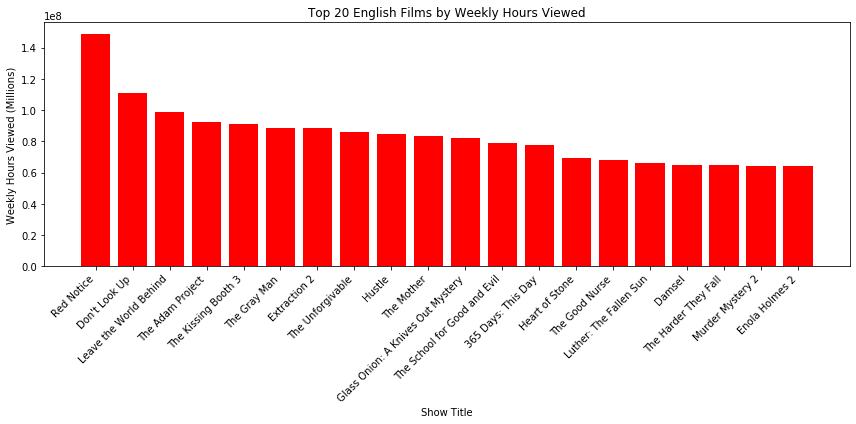

In [18]:
#Top 20 English Films 
plt.figure(figsize=(12,6))
plt.bar(film_20_eng['show_title'], film_20_eng['weekly_hours_viewed'], color='red')
plt.xlabel('Show Title')
plt.ylabel('Weekly Hours Viewed (Millions)')
plt.title('Top 20 English Films by Weekly Hours Viewed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

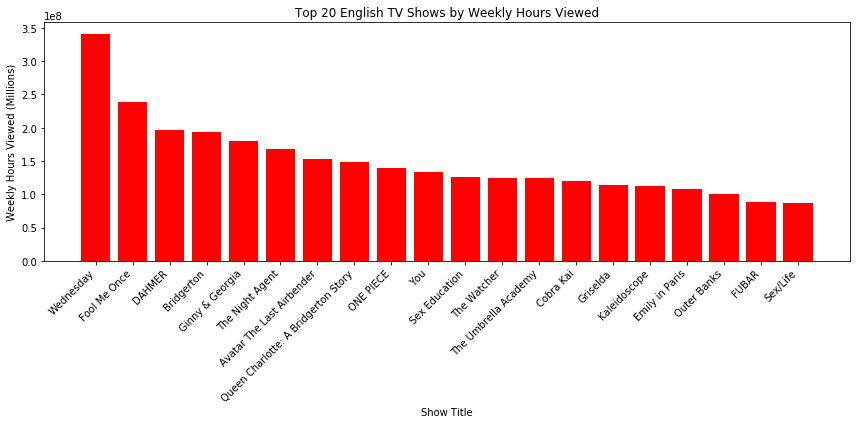

In [19]:
#Top 20 English TVs 
plt.figure(figsize=(12,6))
plt.bar(tv_20_eng['show_title'], tv_20_eng['weekly_hours_viewed'], color='red')
plt.xlabel('Show Title')
plt.ylabel('Weekly Hours Viewed (Millions)')
plt.title('Top 20 English TV Shows by Weekly Hours Viewed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
## Charts for the top movies and tv shows for Non-English 

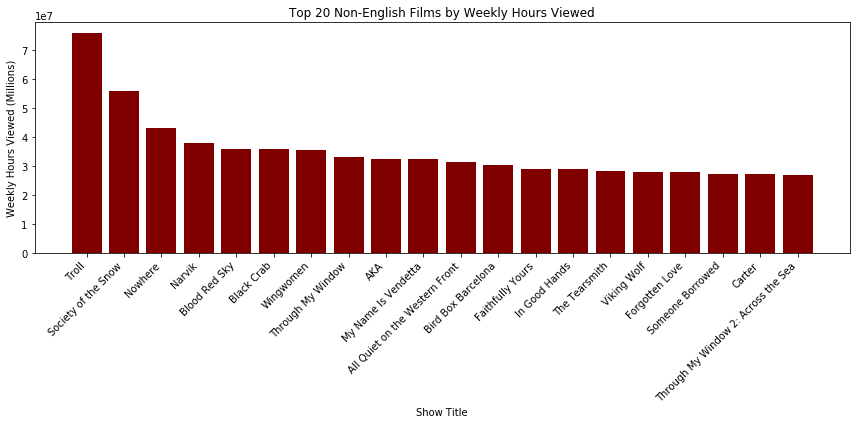

In [23]:
# Top 20 Non-English Films 
plt.figure(figsize=(12,6))
plt.bar(film_20['show_title'], film_20['weekly_hours_viewed'], color='maroon')
plt.xlabel('Show Title')
plt.ylabel('Weekly Hours Viewed (Millions)')
plt.title('Top 20 Non-English Films by Weekly Hours Viewed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

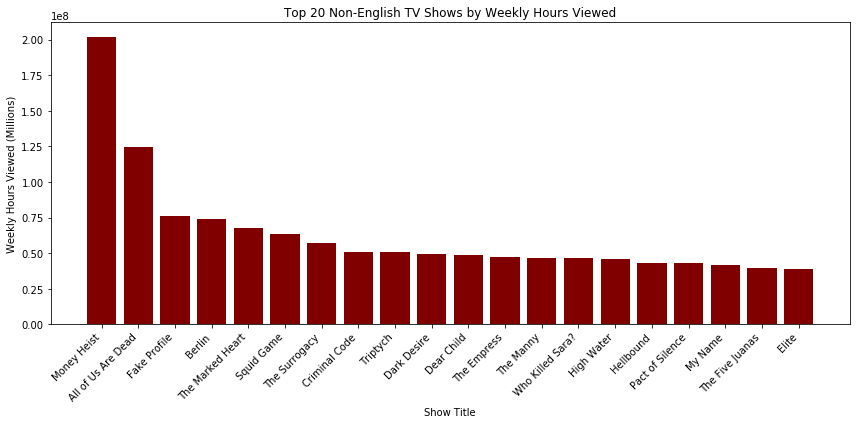

In [24]:
# Top 20 Non-English TV
plt.figure(figsize=(12,6))
plt.bar(tv_20['show_title'], tv_20['weekly_hours_viewed'], color='maroon')
plt.xlabel('Show Title')
plt.ylabel('Weekly Hours Viewed (Millions)')
plt.title('Top 20 Non-English TV Shows by Weekly Hours Viewed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Merge TV series data with country stats
country_tv = stats_countries.merge(stats_tv, how='right', on=['show_title', 'season_title', 'week'])

# Drop unnecessary columns
country_tv_viewership = country_tv.drop(['weekly_rank_y', 'category_x', 'week', 'season_title', 'runtime'], axis=1)

# Get the top 50 shows by cumulative weeks in Top 10
country_tv_top = country_tv_viewership.nlargest(50, 'cumulative_weeks_in_top_10_x')

# Drop duplicates to keep only the top entry per show title
country_tv_top = country_tv_top.drop_duplicates(subset=['show_title'], keep='first')


# Merge Movies with country stats
country_movie = stats_countries.merge(stats_films, how='right', on=['show_title', 'season_title', 'week'])

# Drop unnecessary columns
country_movie_views = country_movie.drop(['weekly_rank_y', 'category_x', 'week', 'season_title', 'runtime', 
                                          'country_name', 'country_iso2', 'weekly_rank_x'], axis=1)

# Get top 20 movies by cumulative weeks
country_films = country_movie_views.nlargest(10, 'cumulative_weeks_in_top_10_x')

# Drop duplicates to keep only the top entry per show title
country_films = country_films.drop_duplicates(subset=['show_title'], keep='first')
country_films

,show_title,cumulative_weeks_in_top_10_x,category_y,weekly_hours_viewed,weekly_views,cumulative_weeks_in_top_10_y,is_staggered_launch,episode_launch_details
7220,Sky High,6.0,Films (Non-English),2880000,NaN,1,False,NaN
151,Major Grom: Plague Doctor,2.0,Films (Non-English),26150000,NaN,1,False,NaN
377,Chernobyl 1986,2.0,Films (Non-English),8250000,NaN,1,False,NaN
407,Deep,2.0,Films (Non-English),3200000,NaN,1,False,NaN
754,Thimmarusu,2.0,Films (Non-English),1220000,NaN,1,False,NaN
930,Ankahi Kahaniya,2.0,Films (Non-English),1260000,NaN,1,False,NaN


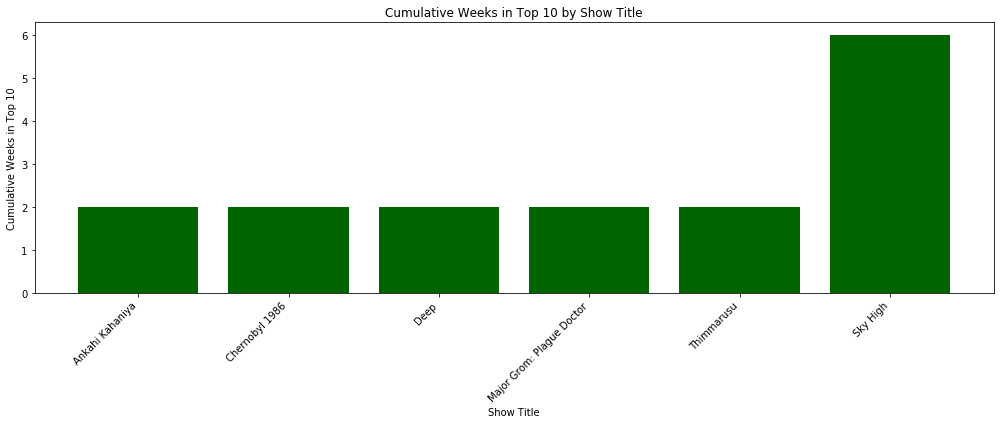

In [26]:
# Movies to be reccommended
# Group by show_title and get the max or sum of cumulative weeks 
show_weeks = country_films.groupby('show_title')['cumulative_weeks_in_top_10_x'].max().dropna()
# show_weeks
# # Sort by cumulative weeks for better readability 
show_weeks = show_weeks.sort_values(ascending=True)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(show_weeks.index, show_weeks.values, color='darkgreen')

# Labels and title
plt.xlabel('Movie Title')
plt.ylabel('Cumulative Weeks in Top 10')
plt.title('Cumulative Weeks in Top 10 by Movie Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


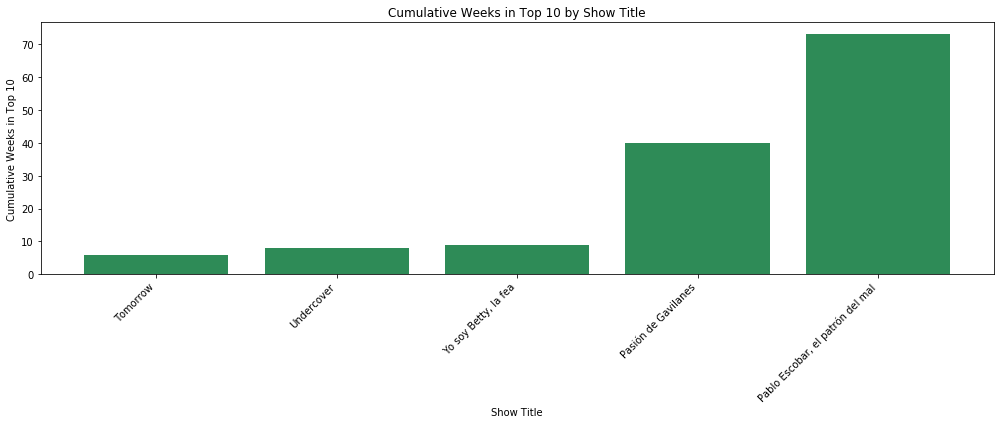

In [27]:
# Movies to be reccommended
# Group by show_title and get the max or sum of cumulative weeks
show_weeks = country_tv_top.groupby('show_title')['cumulative_weeks_in_top_10_x'].max().dropna()
# show_weeks
# # Sort by cumulative weeks for better readability 
show_weeks = show_weeks.sort_values(ascending=True)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(show_weeks.index, show_weeks.values, color='seagreen')

# Labels and title
plt.xlabel('Show Title')
plt.ylabel('Cumulative Weeks in Top 10')
plt.title('Cumulative Weeks in Top 10 by Show Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

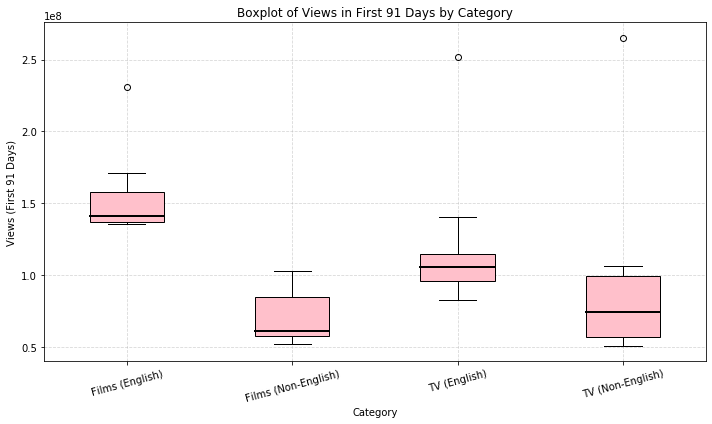

In [40]:
# Box Plot of Eng vs Non eng weekly viewership in first 90 days
films_eng = most_popular[most_popular['category'] == 'Films (English)']
films_noeng = most_popular[most_popular['category'] == 'Films (Non-English)']
tv_eng = most_popular[most_popular['category'] == 'TV (English)']
tv_noeng = most_popular[most_popular['category'] == 'TV (Non-English)']

grouped = most_popular.groupby('category')['views_first_91_days'].apply(list)

# Prepare data and labels
data_to_plot = [grouped[cat] for cat in ['Films (English)', 'Films (Non-English)', 'TV (English)', 'TV (Non-English)'] if cat in grouped.index]
labels = [cat for cat in ['Films (English)', 'Films (Non-English)', 'TV (English)', 'TV (Non-English)'] if cat in grouped.index]

plt.figure(figsize=(10, 6))
plt.boxplot(
    data_to_plot, 
    labels=labels, 
    patch_artist=True, 
    boxprops=dict(facecolor='pink'),
    medianprops=dict(color='black', linewidth=2)  # Make the median line black
)


# Customize labels and title
plt.xlabel('Category')
plt.ylabel('Views (First 91 Days)')
plt.title('Boxplot of Views in First 91 Days by Category')
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()